In [0]:
import pandas as pd
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn import datasets
from sklearn import metrics
import seaborn as sns

In [0]:
wines = datasets.load_wine()

In [12]:
X_wines = wines.data
Y_wines = wines.target
xw = pd.DataFrame(X_wines, columns = ['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium', 
                                      'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols', 'Proanthocyanins', 
                                      'Colour Intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])
yw = pd.DataFrame(Y_wines, columns = ['Target'])
xw.shape

(178, 13)

In [16]:
clustering = MeanShift(bandwidth = bandwidth)
clustering.fit(xw)
yw_clustering = clustering.predict(xw)
accuracy =  metrics.adjusted_rand_score(Y_wines, yw_clustering)
print(f'numero de n_clusters: {i} accurracy {accuracy}')

numero de n_clusters: 10 accurracy 0.39723664098601413


In [14]:
clustering

MeanShift(bandwidth=189.34148018879878, bin_seeding=False, cluster_all=True,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [11]:
bandwidth = estimate_bandwidth(xw)
bandwidth

189.34148018879878

In [17]:
yw_clustering_df = pd.DataFrame(yw_clustering, columns = ['Prediction'])
yw_clustering_df

,Prediction
0,2
1,2
2,2
3,2
4,0
...,...
173,0
174,1
175,1
176,1


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


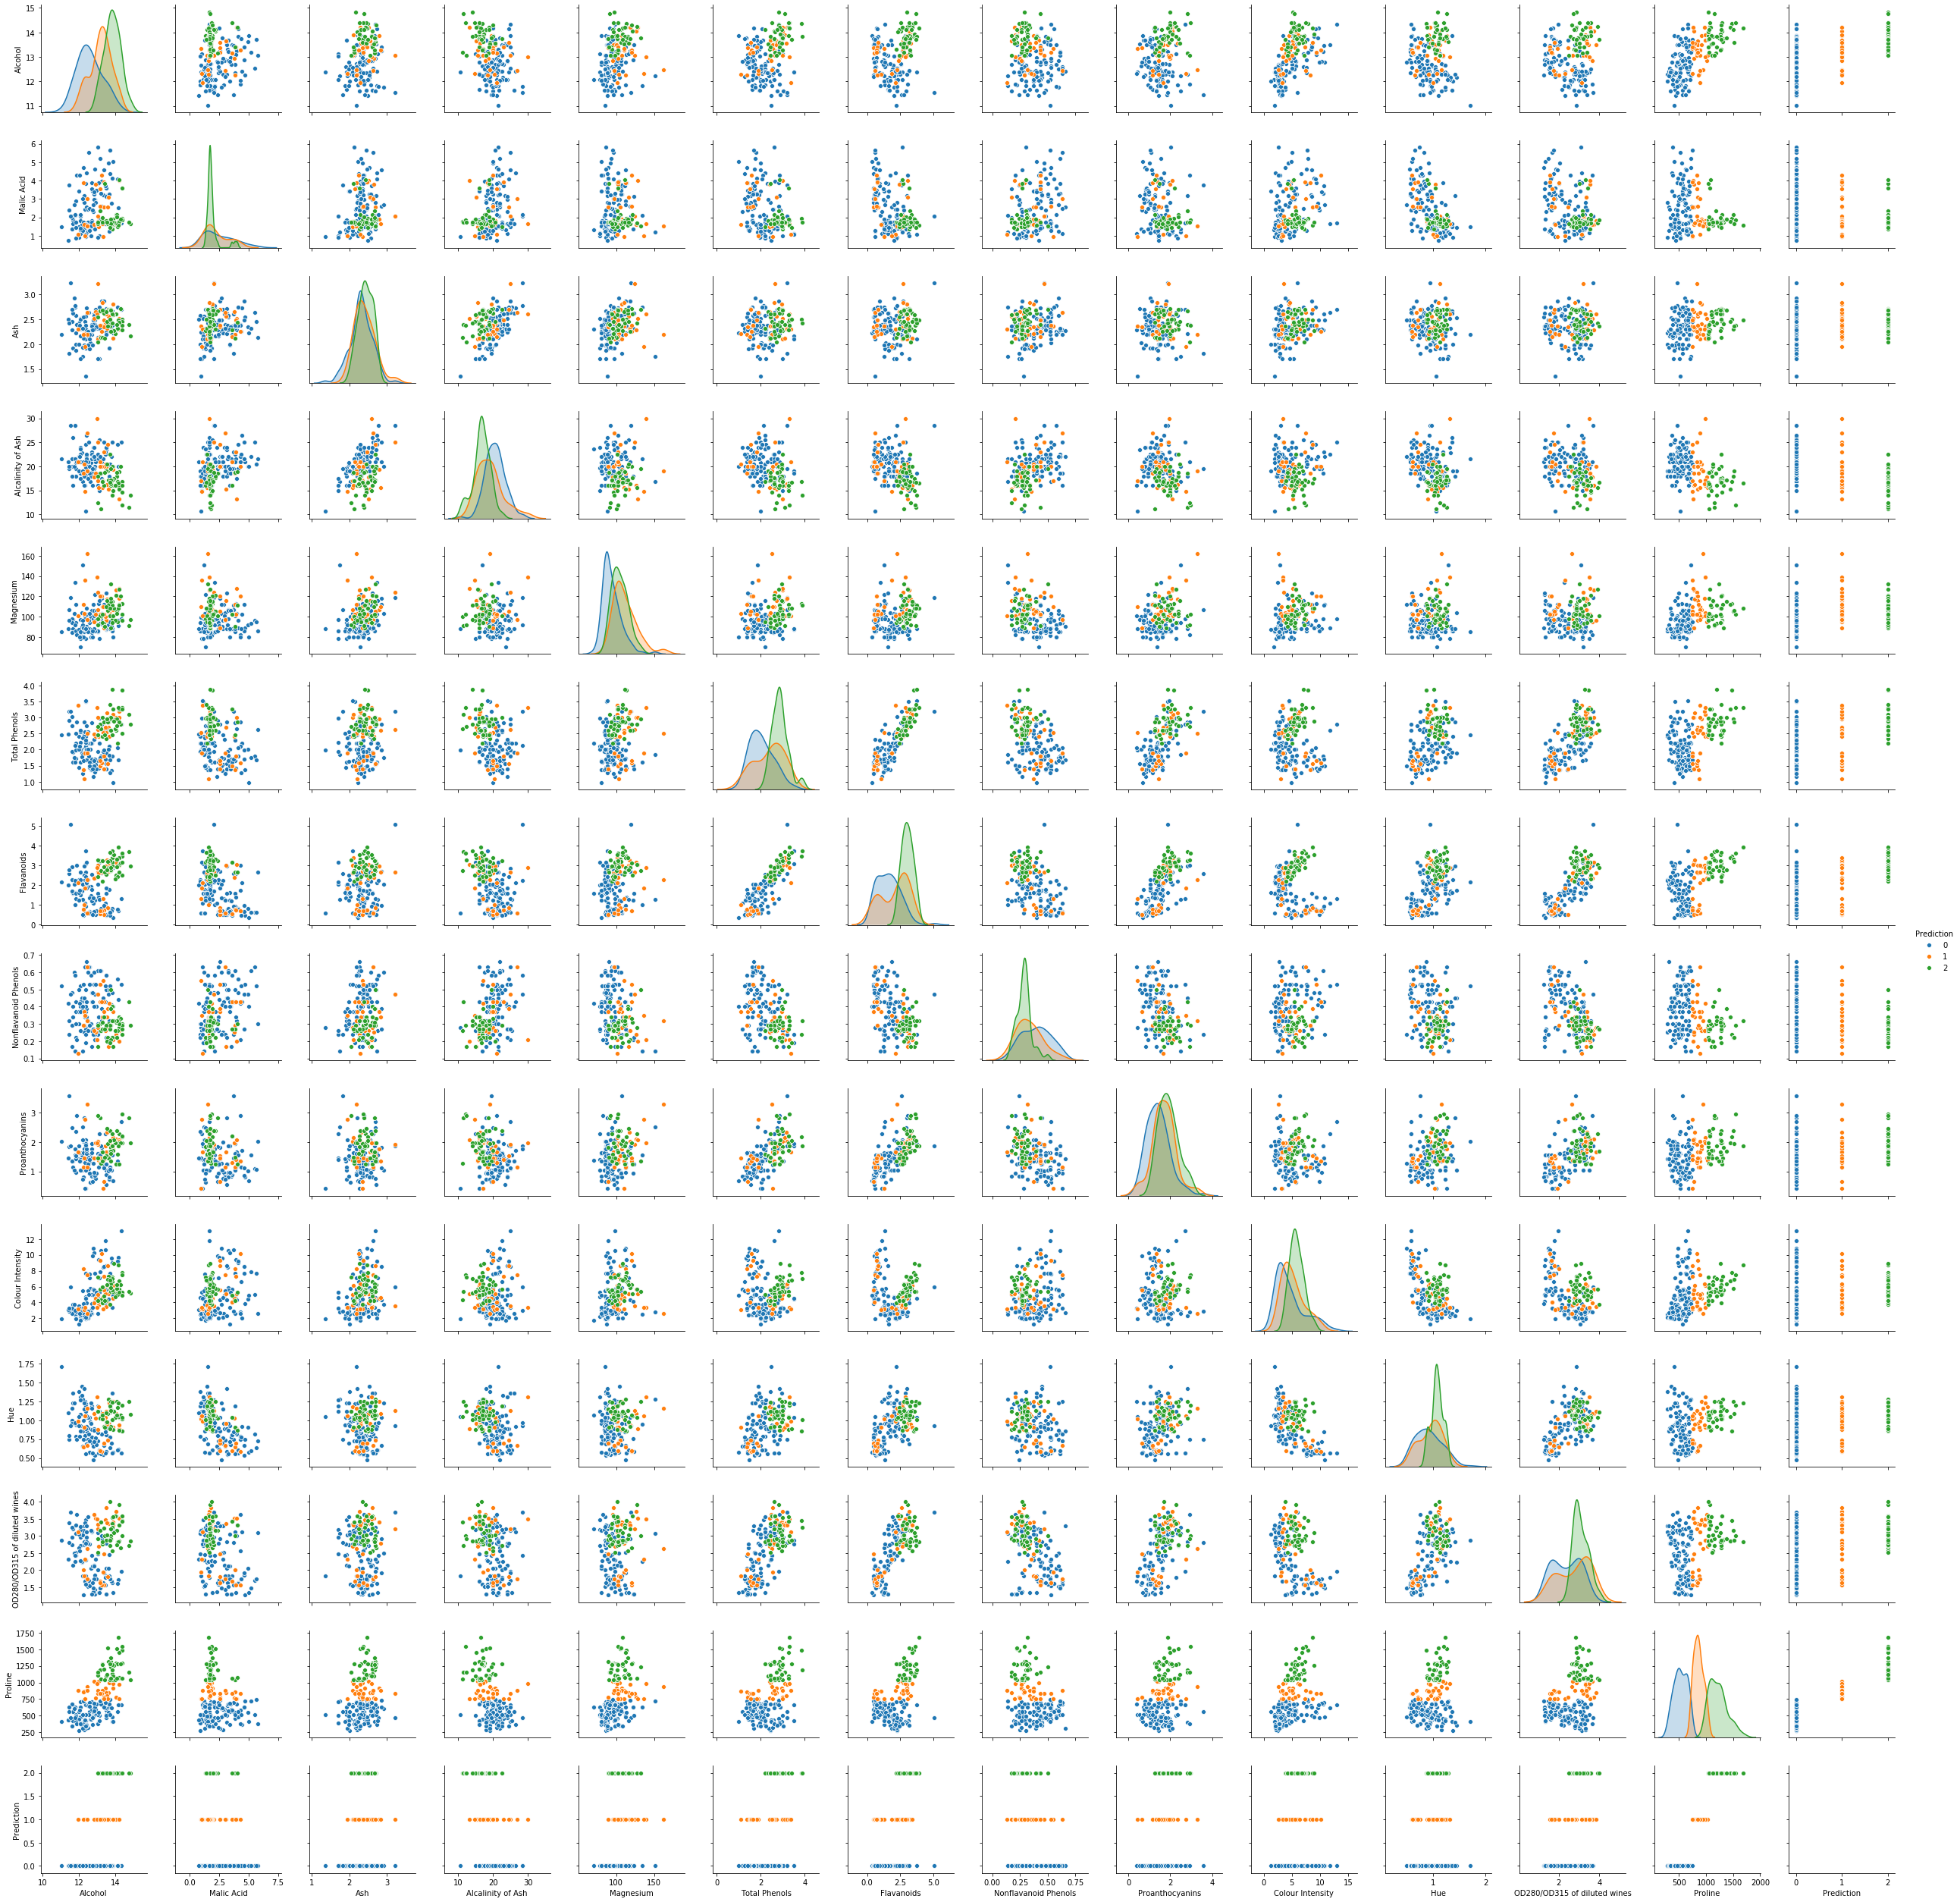

In [18]:
Z = pd.concat([xw,yw_clustering_df],axis=1)
sns.pairplot(Z, hue = 'Prediction')